# Project 04 by Jan Bauer (18-764-571)

## A04.1 Community detection

In [277]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import networkx.drawing.layout as nxlayout
from networkx.algorithms.components import connected_components
from networkx.algorithms.cluster import average_clustering
from networkx import watts_strogatz_graph
from networkx import average_shortest_path_length

In [261]:
def avg(lst):
    return sum(lst) / len(lst)

In [262]:
def compute_average_degree(graph):
    graph_degrees = graph.degree()
    graph_degrees = [graph_degrees[i] for i in graph.nodes()]
    n_edges = sum(graph_degrees)
    n_nodes = len(graph.nodes())
    average_degree = n_edges / n_nodes
    return average_degree

In [263]:
colors = ['red', 'green', 'blue', 'purple', 'orange', 'grey', 'black', 'gold', 'gray', 'silver', 'whitesmoke', 'rosybrown', 'firebrick', 'darksalmon', 'sienna', 'sandybrown', 'bisque', 'tan', 'moccasin', 'floralwhite', 'darkkhaki', 'olivedrab', 'chartreuse', 'palegreen', 'mistyrose', 'coral', 'seashell', 
'peachpuff', 'darkorange', 'navajowhite', 'darkgoldenrod', 'lemonchiffon', 'ivory', 'olive', 'tomato', 'lightsalmon', 'saddlebrown', 'linen', 'antiquewhite', 'papayawhip', 'oldlace', 'cornsilk', 'palegoldenrod', 'lightyellow', 'greenyellow', 'darkseagreen', 'limegreen']

In [264]:
print(len(colors))

47


In [265]:
def randomize_graph(graph):
    return nx.algorithms.smallworld.random_reference(graph, niter=10, connectivity=False, seed=42)

In [266]:
def compare_graphs(graph, randomized_graph, graph_name):
    show_greedy_modularity_communities(graph, graph_name)
    show_greedy_modularity_communities(randomized_graph, "Randomized {}".format(graph_name))
    show_label_propagation_communities(graph, graph_name)
    show_label_propagation_communities(randomized_graph, "Randomized {}".format(graph_name))

In [267]:
def show_greedy_modularity_communities(graph, graph_name):
    communities = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    print("{0} greedy modularity communities exist in the {1}".format(len(communities), graph_name))
    for i in range(len(communities)):
        color = colors[i]
        for node in communities[i]:
            graph.nodes[node]['color'] = color
    nx.draw(graph, with_labels=True, node_color = [graph.nodes[v]['color'] for v in graph.nodes()])
    plt.title("Greedy Modularity Communities in {}".format(graph_name))
    plt.show()

In [268]:
def show_label_propagation_communities(graph, graph_name):
    communities = [c for c in nxcom.label_propagation_communities(graph)]
    print("{0} label propagation communities exist in the {1}".format(len(communities), graph_name))
    for i in range(len(communities)):
        color = colors[i]
        for node in communities[i]:
            graph.nodes[node]['color'] = color

    nx.draw(graph, with_labels=True, node_color = [graph.nodes[v]['color'] for v in graph.nodes()])
    plt.title("Label Propagation Communities in {}".format(graph_name))
    plt.show()

### Karate Graph

In [19]:
karate_graph = nx.read_gml('Data/graph_karate.gml')
randomized_karate_graph = randomize_graph(karate_graph)

3 greedy modularity communities exist in the Karate Graph


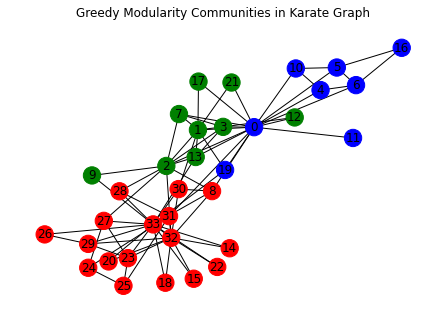

4 greedy modularity communities exist in the Randomized Karate Graph


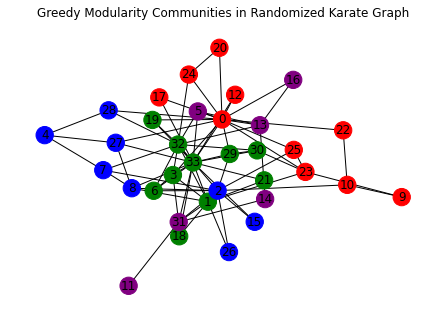

3 label propagation communities exist in the Karate Graph


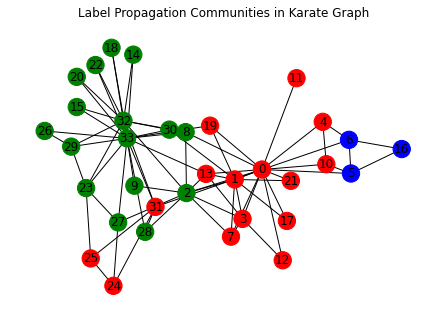

1 label propagation communities exist in the Randomized Karate Graph


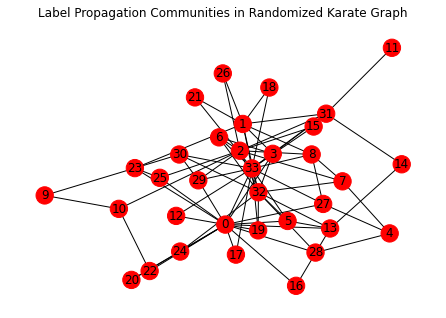

In [20]:
compare_graphs(karate_graph, randomized_karate_graph, "Karate Graph")

### Dolphin Graph

In [74]:
dolphin_graph = nx.read_gml('Data/graph_dolphins.gml')
randomized_dolphin_graph = nx.read_gml('Data Random/graph_dolphins_random.gml')

4 greedy modularity communities exist in the Dolphin Graph


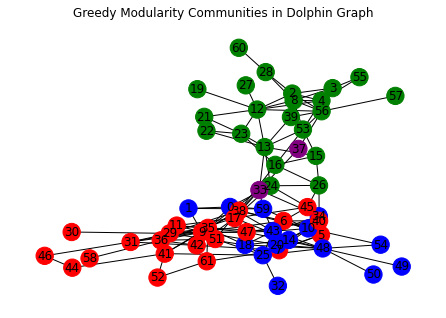

6 greedy modularity communities exist in the Randomized Dolphin Graph


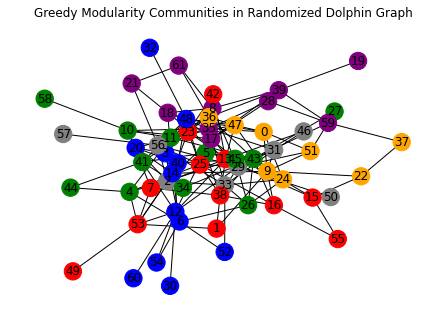

6 label propagation communities exist in the Dolphin Graph


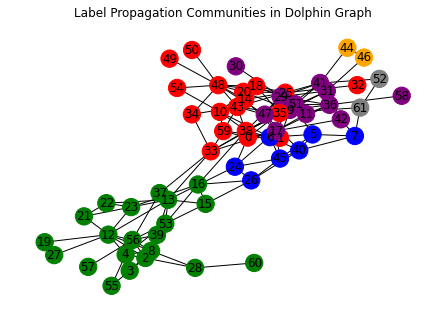

1 label propagation communities exist in the Randomized Dolphin Graph


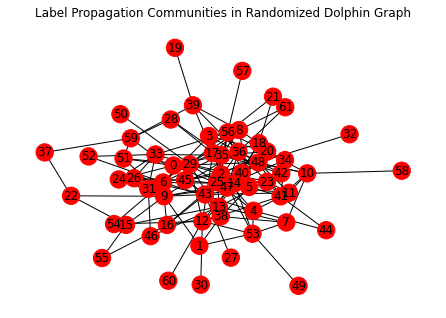

In [83]:
compare_graphs(dolphin_graph, randomized_dolphin_graph, "Dolphin Graph")

### Facebook Graph

In [210]:
facebook_graph = nx.read_gml('Data/graph_facebook.gml')
randomized_facebook_graph = nx.read_gml('Data Random/graph_facebook_random.gml')

13 greedy modularity communities exist in the Facebook Graph


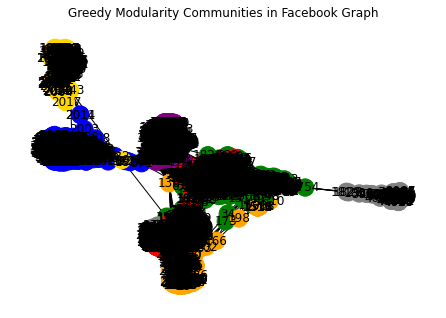

21 greedy modularity communities exist in the Randomized Facebook Graph


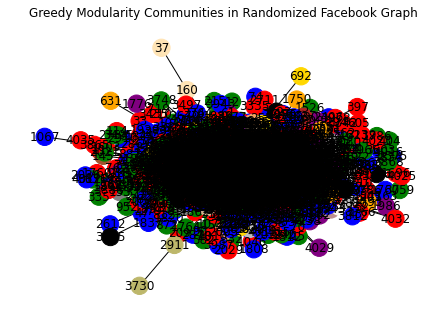

44 label propagation communities exist in the Facebook Graph


IndexError: list index out of range

In [211]:
compare_graphs(facebook_graph, randomized_facebook_graph, "Facebook Graph")

## A04.2 Erdos-Renyi random networks

In [189]:
def visualize_erdos_renyi_graph(number_of_nodes, average_degree):
    graph = nx.erdos_renyi_graph(number_of_nodes, average_degree/number_of_nodes)
    nx.draw(graph, nx.spring_layout(graph), with_labels=False, node_size=16)
    plt.title("Erdos Renyi Graph with {0} nodes and ⟨k⟩ = {1}".format(number_of_nodes, average_degree))
    plt.show()
    print("Computed average degree <k> = {}".format(compute_average_degree(graph)))

In [199]:
def plot_ecp_vs_lcc(x,y, number_of_nodes):
    plt.scatter(x, y)
    plt.axvline(x=1/number_of_nodes, color='red')
    plt.xscale('log')
    plt.yscale('linear')
    plt.title("Edge Creation Probability vs <Largest Connected Component Relative Size>")
    plt.xlabel('p')
    plt.ylabel('N_G/N')
    plt.show()

In [207]:
def plot_ecp_vs_acm(x,y):
    plt.scatter(x, y)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.title("Edge Creation Probability vs <Average Clustering>")
    plt.xlabel('p')
    plt.ylabel('N_G/N')
    plt.show()

In [ ]:
def plot_ecp_vs_acm(x,y):
    plt.scatter(x, y)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.title("Edge Creation Probability vs <Average Clustering>")
    plt.xlabel('p')
    plt.ylabel('N_G/N')
    plt.show()

Task: Generate three Erdos-Renyi networks with 𝑁 = 500
nodes and average degree (a)⟨𝑘⟩ = 0.2, (b)⟨𝑘⟩ = 1 and (c)
⟨𝑘⟩ = 2. Visualize these networks.

In [195]:
number_of_nodes = 500

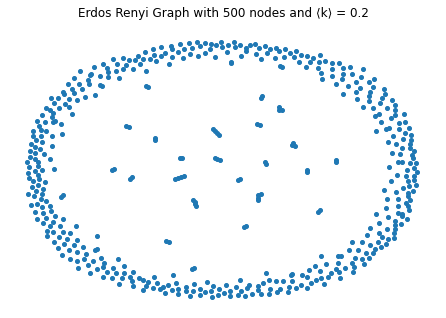

Computed average degree <k> = 0.204


In [190]:
visualize_erdos_renyi_graph(number_of_nodes, 0.2)

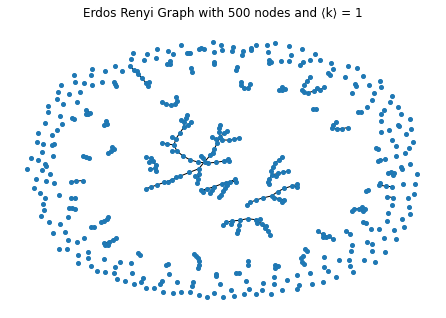

Computed average degree <k> = 0.948


In [191]:
visualize_erdos_renyi_graph(number_of_nodes, 1)

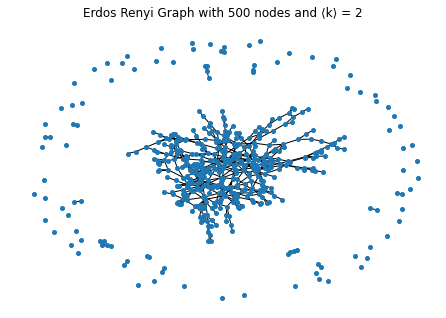

Computed average degree <k> = 1.896


In [192]:
visualize_erdos_renyi_graph(number_of_nodes, 2)

In [183]:
n_nodes = 100
n_samples = 100
average_lcc_probabilities = {}
average_clustering_metrics = {}

edge_creation_probabilities = np.append(np.around(np.linspace(0,0.1,11), decimals=2), np.around(np.linspace(0.2,1,9), decimals=2), axis=0)
#print(edge_creation_probabilities)
for edge_creation_probability in edge_creation_probabilities:
    lcc_probabilities = []
    average_clusterings = []
    for i in range(n_samples):
        graph = nx.erdos_renyi_graph(n_nodes, edge_creation_probability)
        lcc = len(max(connected_components(graph), key=len))
        lcc_probability = lcc/n_nodes
        lcc_probabilities.append(lcc_probability)
        average_clusterings.append(average_clustering(graph))
        #print(len(largest_cc))
    average_lcc_probabilities[edge_creation_probability] = avg(lcc_probabilities)
    average_clustering_metrics[edge_creation_probability] = avg(average_clusterings)

1. Plot the probability that a node belongs to the largest
connected component $𝑁_𝐺/𝑁$ as a function of $p$ and mark
with a vertical line the critical probability $p_c = 1/N$

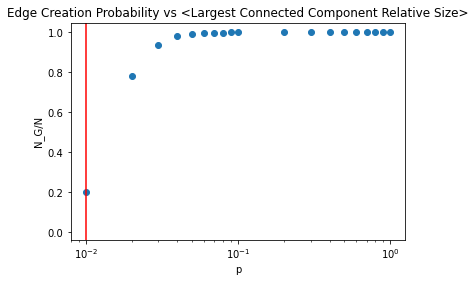

In [201]:
x = list(average_lcc_probabilities.keys())
y = list(average_lcc_probabilities.values())
plot_ecp_vs_lcc(x, y, n_nodes)

Plot the average clustering $⟨𝐶⟩$ as a function of $p$ and give
an interpretation of the result.

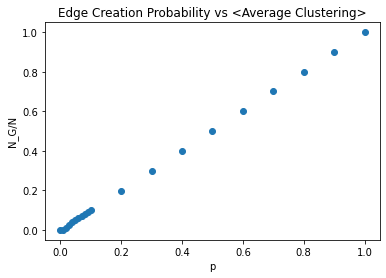

In [208]:
x = list(average_clustering_metrics.keys())
y = list(average_clustering_metrics.values())
plot_ecp_vs_acm(x,y)

The average clustering coefficient is computed as the average of all nodes clustering coefficients. $<C> = \frac{1}{n} \sum_{i=1}^{n}c_i$. The clustering coefficient for each node represents the number of closed triangles divided over number of all possible triangles. The diagram shows that this ratio increases linearly with the edge creation probability.

### A04.3 Small-world with high clustering

In [281]:
def plot_ecp_vs_cpc0(x,y):
    plt.scatter(x, y)
    plt.xscale('log')
    plt.yscale('linear')
    plt.title("Edge Creation Probability vs <C(p)>/<C(0)>")
    plt.ylim(0,1)
    plt.xlabel('p')
    plt.ylabel('<C(p)>/<C(0)>')
    plt.show()

In [284]:
def plot_ecp_vs_dpd0(x,y):
    plt.scatter(x, y)
    plt.xscale('log')
    plt.yscale('linear')
    plt.title("Edge Creation Probability vs <D(p)>/<D(0)>")
    plt.ylim(0,1)
    plt.xlabel('p')
    plt.ylabel('<D(p)>/<D(0)>')
    plt.show()

In [286]:
n_nodes = 100
k = 5
n_neighbours = 2*k
n_samples = 100
empirical_clustering_coefficients = {}
empirical_average_shortest_paths = {}
edge_rewiring_probabilities = np.around(np.linspace(0,1,22), decimals=2)
for edge_rewiring_probability in edge_rewiring_probabilities:
    average_shortest_paths = []
    clustering_coefficients = []
    for i in range(n_samples):
        graph = watts_strogatz_graph(n_nodes, n_neighbours, edge_rewiring_probability)
        clustering_coefficients.append(average_clustering(graph))
        average_shortest_paths.append(average_shortest_path_length(graph))
    empirical_clustering_coefficients[edge_rewiring_probability] = avg(clustering_coefficients)
    empirical_average_shortest_paths[edge_rewiring_probability] = avg(average_shortest_paths)

In [287]:
analytical_clustering_coefficients = {}
for edge_rewiring_probability in edge_rewiring_probabilities:
    p = edge_rewiring_probability
    analytical_clustering_coefficient = 1.5*(k-1)/(2*k-1)*(1-p)**3
    analytical_clustering_coefficients[p] = analytical_clustering_coefficient

In [288]:
from scipy.stats.stats import pearsonr   
print("p => empirical cc; analytical cc")
for p in edge_rewiring_probabilities:
    print("{0} => {1}; {2}".format(p, empirical_clustering_coefficients[p], analytical_clustering_coefficients[p]))
print("As you can see the analytical and the empirical results have a certain correlation. However it is not 100% accurate")
pearsonr(list(empirical_clustering_coefficients.values()), list(analytical_clustering_coefficients.values()))

p => empirical cc; analytical cc
0.0 => 0.666666666666665; 0.6666666666666666
0.05 => 0.5817501165501164; 0.5715833333333332
0.1 => 0.5001442735042734; 0.48600000000000004
0.14 => 0.4425760561660562; 0.42403733333333327
0.19 => 0.38382342157842153; 0.354294
0.24 => 0.3293160410830998; 0.29265066666666667
0.29 => 0.27902229069949636; 0.23860733333333328
0.33 => 0.24808043337381558; 0.20050866666666659
0.38 => 0.21509692067736177; 0.15888533333333332
0.43 => 0.18271837432175658; 0.12346200000000003
0.48 => 0.1594167761813349; 0.09373866666666666
0.52 => 0.14488067213746; 0.07372799999999999
0.57 => 0.12752128975599564; 0.05300466666666668
0.62 => 0.11394098227795596; 0.036581333333333334
0.67 => 0.10634006223051111; 0.023957999999999993
0.71 => 0.10112648554833538; 0.016259333333333337
0.76 => 0.09635572300506504; 0.009215999999999998
0.81 => 0.0946369170088597; 0.004572666666666662
0.86 => 0.09247150201793383; 0.0018293333333333339
0.9 => 0.09304041234049745; 0.0006666666666666662
0.95 

(0.9993215733655709, 3.716396000680192e-30)

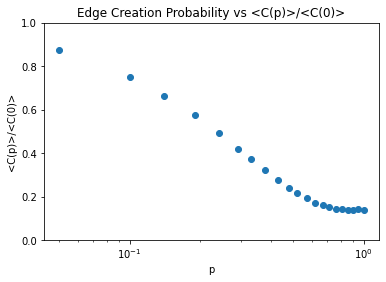

In [289]:
C_0 = mean_clustering_coefficients[0]
x = list(empirical_clustering_coefficients.keys())
y = np.array(list(empirical_clustering_coefficients.values()))/C_0
plot_ecp_vs_cpc0(x,y)

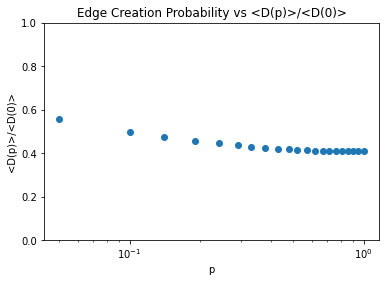

In [290]:
D_0 = empirical_average_shortest_paths[0]
x = list(empirical_average_shortest_paths.keys())
y = np.array(list(empirical_average_shortest_paths.values()))/D_0
plot_ecp_vs_dpd0(x,y)